In [1]:
#Učitavamo neophodne biblioteke

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import Binarizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint


In [2]:
#Učitavamo dataset

esa = pd.read_csv("baza_v1.csv", sep=';',  index_col="Redni br.")
esa.head()

,BR,Pol,GodCent,Event,Time,EventCVI,EventIM,EventTu,RODJENJE,GODKraj,...,DG1,DG20,DG2,DG30,DG3,DG40,DG4,TIPHD,GODKraj.1,PL
Redni br.,,,,,,,,,,,,,,,,,,,,,
1,156,1,61.0,0,50.0,0.0,0.0,1.0,10.01.1934,65.0,...,Plasmocytoma,4.0,Insuff renum chr term,4.0,Anaemia sec,4.0,Exitus letalis,BHD,65.0,M
2,166,1,29.0,0,17.0,0.0,0.0,0.0,13.05.1966,30.0,...,VUR,4.0,Insuff renum chr term,4.0,TBC,4.0,meningoencephalitis pneumococcida,AHD,30.0,M
3,287,2,53.0,0,149.0,0.0,1.0,0.0,28.05.1949,64.0,...,Nephrectomiam,4.0,Insuff renum chr term,4.0,Insuff renum chr term,4.0,Anaemia sec,BHD,64.0,Z
4,350,1,63.0,0,139.0,0.0,0.0,0.0,27.10.1942,71.0,...,Glomerolonephritis,4.0,AVF,4.0,HBV,4.0,Stenocardia,BHD,71.0,M
5,372,2,52.0,0,74.0,0.0,0.0,0.0,30.10.1955,58.0,...,Renes policystici,4.0,Hypertensio art,4.0,Hepatitis,4.0,Th Pegasys,HDF,58.0,Z


In [3]:
#Pregled podataka u Datasetu

esa.describe()

,BR,Pol,GodCent,Event,Time,EventCVI,EventIM,EventTu,GODKraj,HD_MES,ESA,Tu,MalTu,CCI,Dg,DG20,DG30,DG40,GODKraj.1
count,439.000000,439.000000,437.000000,439.0,438.000000,438.000000,433.000000,433.000000,424.000000,437.000000,436.000000,436.000000,436.000000,435.000000,436.000000,437.000000,432.000000,400.000000,424.000000
mean,225.785877,1.435080,50.377574,0.0,107.904110,0.109589,0.133949,0.136259,57.514151,90.803204,0.561927,0.112385,0.075688,4.427586,4.644495,3.990847,3.888889,3.815000,57.405660
std,128.715217,0.496333,14.278255,0.0,136.086172,0.312734,0.340992,0.343460,13.731460,77.443070,0.496720,0.316203,0.264802,1.723027,2.604989,0.116951,0.488063,0.675957,14.001708
min,2.000000,1.000000,17.000000,0.0,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,114.500000,1.000000,39.000000,0.0,36.000000,0.000000,0.000000,0.000000,48.000000,31.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,4.000000,48.000000
50%,227.000000,1.000000,51.000000,0.0,72.500000,0.000000,0.000000,0.000000,59.000000,66.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,59.000000
75%,336.500000,2.000000,62.000000,0.0,142.000000,0.000000,0.000000,0.000000,67.250000,133.000000,1.000000,0.000000,0.000000,6.000000,7.000000,4.000000,4.000000,4.000000,67.250000
max,447.000000,2.000000,85.000000,0.0,1317.000000,1.000000,1.000000,1.000000,86.000000,418.000000,1.000000,1.000000,1.000000,11.000000,9.000000,4.000000,4.000000,4.000000,86.000000


In [4]:
#Pregled kolona dataseta

esa.columns

Index(['BR', 'Pol', 'GodCent', 'Event', 'Time', 'EventCVI', 'EventIM',
       'EventTu', 'RODJENJE', 'GODKraj', 'HD_PRVA', 'HD_CENTAR', 'HD_MES',
       'HDKRAJ', 'DATHDKRAJ', 'ESA', 'Tu', 'MalTu', 'CCI', 'Dg', 'DG1', 'DG20',
       'DG2', 'DG30', 'DG3', 'DG40', 'DG4', 'TIPHD', 'GODKraj.1', 'PL'],
      dtype='object')

In [5]:
#Kolone sa tekstualnim podacima - dijagnozama pretvaramo u tip string
esa['DG1'] = esa["DG1"].astype(str)
esa['DG2'] = esa["DG2"].astype(str)
esa['DG3'] = esa["DG3"].astype(str)
esa['DG4'] = esa["DG4"].astype(str)
esa['HDKRAJ'] = esa["HDKRAJ"].astype(str)
esa["TIPHD"] = esa["TIPHD"].astype(str)

In [6]:
#Kopiramo dataset

esa_1 = esa.copy()
esa_1 = esa_1.drop(['BR','GodCent', 'Event', 'Time', 'RODJENJE', 'GODKraj', 'HD_PRVA', 'HD_CENTAR',"HDKRAJ", 'DATHDKRAJ', 'GODKraj.1', "PL"], axis=1)
esa_1[["HD_MES", "Tu", "MalTu"]].fillna(0)
esa_1['TIPHD'].fillna("NNN")
esa_1 = esa_1.dropna()

In [9]:
#Izdvajamo redove sa podacima gde je primenjena ESA terapija

esa_2 = esa_1[esa_1["ESA"] == 1.0]

In [10]:
#Posmatramo vrednosti u koloni sa navedenom terapijom

esa_2["DG4"].describe()

count                            219
unique                           101
top       Hyperparathireoidismus sec
freq                              12
Name: DG4, dtype: object

In [11]:
#Pregled tipova podataka u Datasetu

esa_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 439
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pol       391 non-null    int64  
 1   EventCVI  391 non-null    float64
 2   EventIM   391 non-null    float64
 3   EventTu   391 non-null    float64
 4   HD_MES    391 non-null    float64
 5   ESA       391 non-null    float64
 6   Tu        391 non-null    float64
 7   MalTu     391 non-null    float64
 8   CCI       391 non-null    float64
 9   Dg        391 non-null    float64
 10  DG1       391 non-null    object 
 11  DG20      391 non-null    float64
 12  DG2       391 non-null    object 
 13  DG30      391 non-null    float64
 14  DG3       391 non-null    object 
 15  DG40      391 non-null    float64
 16  DG4       391 non-null    object 
 17  TIPHD     391 non-null    object 
dtypes: float64(12), int64(1), object(5)
memory usage: 58.0+ KB


In [12]:
esa_1["DG20"].value_counts()

4.0    388
3.0      2
2.0      1
Name: DG20, dtype: int64

In [13]:
#Posmatramo podatke iz filtriranog dela dataseta koji je od interesa za analizu

esa_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 3 to 435
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pol       219 non-null    int64  
 1   EventCVI  219 non-null    float64
 2   EventIM   219 non-null    float64
 3   EventTu   219 non-null    float64
 4   HD_MES    219 non-null    float64
 5   ESA       219 non-null    float64
 6   Tu        219 non-null    float64
 7   MalTu     219 non-null    float64
 8   CCI       219 non-null    float64
 9   Dg        219 non-null    float64
 10  DG1       219 non-null    object 
 11  DG20      219 non-null    float64
 12  DG2       219 non-null    object 
 13  DG30      219 non-null    float64
 14  DG3       219 non-null    object 
 15  DG40      219 non-null    float64
 16  DG4       219 non-null    object 
 17  TIPHD     219 non-null    object 
dtypes: float64(12), int64(1), object(5)
memory usage: 32.5+ KB


In [14]:
#Koristimo klasu lebelEncoder-a za rad sa više kolona

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        #Transforms columns of X specified in self.columns using
        #LabelEncoder(). If no columns specified, transforms all
        #columns in X.
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [15]:
#Vršimo trasnformaciju tekstualnih (kolona sa dijagnozama) u numeričke, kako bi mogli da ih 
#koristimo za rad
 
transforming_data = MultiColumnLabelEncoder(columns = ['DG1', 'DG2', 'DG3', 'DG4', "TIPHD"]).fit_transform(esa_2)
transforming_data.head()

,Pol,EventCVI,EventIM,EventTu,HD_MES,ESA,Tu,MalTu,CCI,Dg,DG1,DG20,DG2,DG30,DG3,DG40,DG4,TIPHD
Redni br.,,,,,,,,,,,,,,,,,,
3,2,0.0,1.0,0.0,135.0,1.0,0.0,0.0,5.0,9.0,19,4.0,18,4.0,39,4.0,4,1
5,2,0.0,0.0,0.0,59.0,1.0,0.0,0.0,5.0,3.0,26,4.0,14,4.0,31,4.0,78,2
7,2,0.0,0.0,0.0,122.0,1.0,0.0,0.0,3.0,1.0,11,4.0,7,4.0,62,4.0,43,1
8,1,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,8.0,32,4.0,18,4.0,47,4.0,100,2
10,1,0.0,0.0,0.0,43.0,1.0,0.0,0.0,5.0,5.0,9,4.0,18,4.0,16,4.0,82,2


In [31]:
#Izdvajamo kolone koje ćemo koristiti u Random Forest algoritmu

final_data = transforming_data[['Pol','HD_MES', 'EventCVI', 'EventIM', 'EventTu', 'Tu', 'MalTu', 'CCI', 'Dg', 'DG1', 'DG20', 'DG2', 'DG30', 'DG3', 'DG40', 'DG4', "TIPHD"]]
final_data.head()

,Pol,HD_MES,EventCVI,EventIM,EventTu,Tu,MalTu,CCI,Dg,DG1,DG20,DG2,DG30,DG3,DG40,DG4,TIPHD
Redni br.,,,,,,,,,,,,,,,,,
3,2,135.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,19,4.0,18,4.0,39,4.0,4,1
5,2,59.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,26,4.0,14,4.0,31,4.0,78,2
7,2,122.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,11,4.0,7,4.0,62,4.0,43,1
8,1,34.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,32,4.0,18,4.0,47,4.0,100,2
10,1,43.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,9,4.0,18,4.0,16,4.0,82,2


In [32]:
#Određujemo lebel i atribute

y_var = final_data["DG40"]
x_var = final_data[['Pol','HD_MES', 'EventCVI', 'EventIM', 'EventTu', 'Tu', 'MalTu', 'CCI', 'Dg', 'DG1', 'DG20', 'DG2', 'DG30', 'DG3', 'TIPHD']]

### Rendom forest Classifier

In [19]:
#Train test split podela dataseta

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(175, 15) (175,)
(44, 15) (44,)


In [20]:
rfc = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100)
model_rfc = rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test)

0.8636363636363636

In [21]:
#Primenjujemo RandomForestClassifier sa nekoliko estimatora kako bi dobili što bolji rezultat

rezultat_rfc = {}
estimators = [100, 150, 200, 250, 300]
for item in estimators:
    rf = RandomForestClassifier(n_estimators=item)
    model_rfc = rf.fit(X_train, y_train)
    rezultat_rfc[item] = (model_rfc.score(X_test, y_test))


prikaz = pd.DataFrame.from_dict(rezultat_rfc, orient='index').rename(columns={0: 'Rezultat RFC'})
prikaz_rezultat_rfc = prikaz.sort_values(by="Rezultat RFC", ascending=False)
prikaz_rezultat_rfc

,Rezultat RFC
100,0.863636
150,0.863636
200,0.863636
250,0.863636
300,0.863636


In [22]:
#Koristimo GradientBoostingClassifier za finu optimizaciju rezultata.
#GradientBoostingClassifier se koristi kod  metoda klasifikacije

gb = GradientBoostingClassifier()
model_rfc_gb = gb.fit(X_train, y_train)
model_rfc_gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
#Rezultat fine optimizacije

model_rfc_gb.score(X_test, y_test)

0.8409090909090909

In [24]:
#crossvalidation
hyperparameters = {
                   "max_depth": randint(3, 6),
                   "max_features": randint(1, 10),
                   "min_samples_leaf": randint(1, 10)
                  }

In [25]:
clf = RandomizedSearchCV(model_rfc, hyperparameters, cv=5)

clf.fit(X_train, y_train)

print("GB Score after CV: %s" % clf.score(X_test, y_test))

C:\Users\Filip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GB Score after CV: 0.8636363636363636


In [26]:
m_rfc = model_rfc.feature_importances_

In [28]:
col = ['Pol','HD_MES', 'EventCVI', 'EventIM', 'EventTu', 'Tu', 'MalTu', 'CCI', 'Dg', 'DG1', 'DG20', 'DG2', 'DG30', 'DG3', 'TIPHD']

In [29]:
uticaj_rfc_DG4 = pd.DataFrame({"Najbitnije karakteristike": col, "Izmeren uticaj": m_rfc} )
uticaj_rfc_DG4.sort_values("Izmeren uticaj", ascending = False).head(6)

,Najbitnije karakteristike,Izmeren uticaj
11,DG2,0.174508
1,HD_MES,0.167682
13,DG3,0.131484
9,DG1,0.121418
8,Dg,0.099567
7,CCI,0.079848


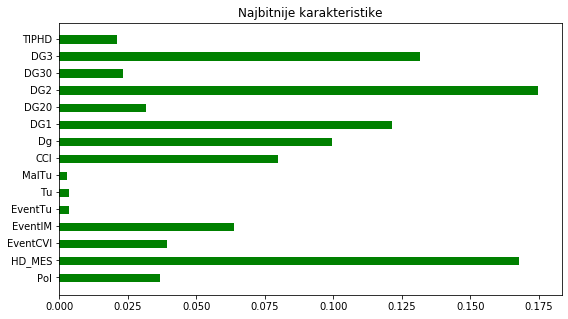

<Figure size 720x720 with 0 Axes>

In [30]:
y_rfc = model_rfc.feature_importances_
fig, ax = plt.subplots() 
width = 0.5 
ind = np.arange(len(y_rfc)) 
ax.barh(ind, y_rfc, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Najbitnije karakteristike')
plt.figure(figsize=(10,10))
fig.set_size_inches(9, 5, forward=True)
plt.show()